In [1]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random

Using TensorFlow backend.


In [2]:
'''
LOAD Fashion-MNIST
'''
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(type(x_test))
print(type(y_test[0]))

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
<class 'numpy.ndarray'>
<class 'numpy.uint8'>


In [3]:
# fashion mnist label name
fashion_mnist_labels = np.array([
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'])

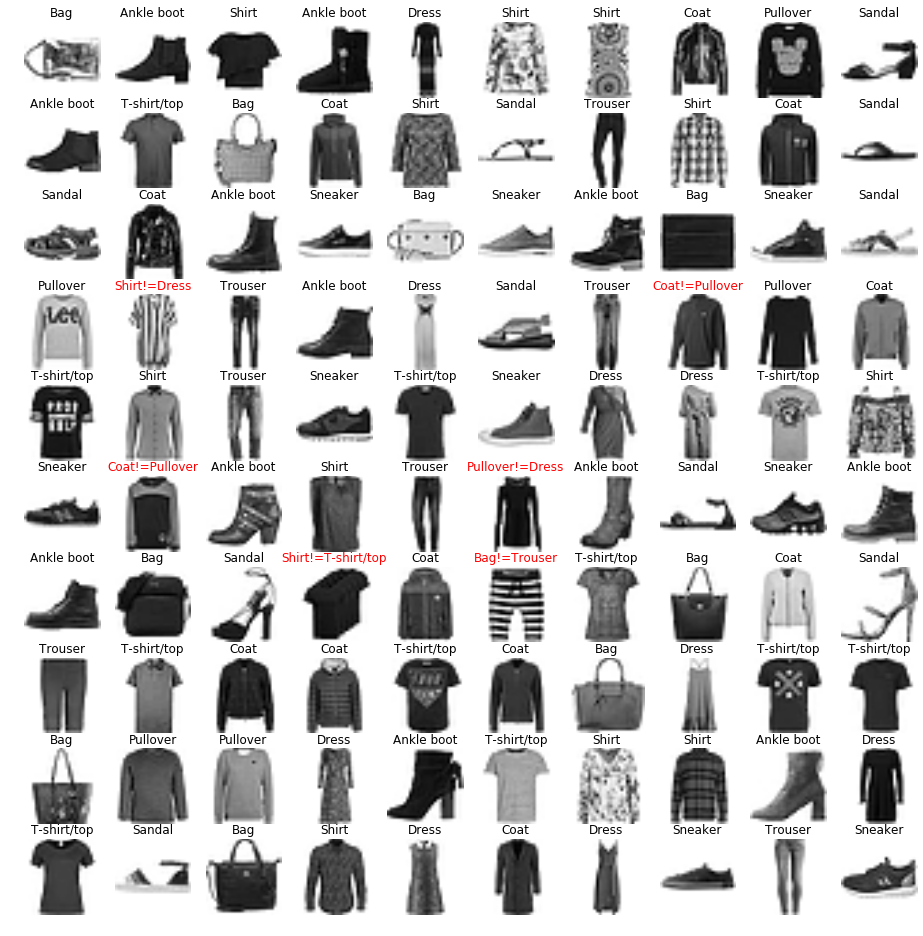

The number of correct answers: 94
The number of mistake: 6
A correct answer rate: 94.0 %


In [4]:
'''
LOAD MODEL AND PREDICT
'''

# use CNN
model = load_model('model_fashion-mnist_cnn_train1_epoch12.h5')

    
def convertMnistData(image):
    img = image.astype('float32')
    img /= 255

    return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
prefictionNum = 100

for i in range(prefictionNum):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')

    ret = model.predict(data, batch_size=1) 
    #print(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(fashion_mnist_labels[bestclass])
        right += 1
    else:
        plt.title(fashion_mnist_labels[bestclass] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
        mistake += 1
                                                                   
plt.show()
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')